# Explore here

In [248]:
import pandas as pd

total_data = pd.read_csv('/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/data/raw/AB_NYC_2019.csv')
total_data

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [249]:
total_data.shape

(48895, 16)

In [250]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Aunque hay datos nulos, su valor no llega al 40% del total.

### AVERIGUAR DUPLICADOS

### duplicate().sum() --> significa te averigua si hay duplicados y sum te suma los duplicados totales
### drop() --> elimina la fila / columna que le pases
### drop_duplicates--> te elimina los duplicados

In [251]:
# revisamos si del total_data hay filas duplicadas y súmalas para saber si se eliminan o no (en caso afirmativo habría que eliminar los duplicados)

print(total_data.duplicated().sum())


0


### ELIMINAR INFORMACIÓN IRRELEVANTE

In [252]:
total_data.drop(["id","name", "host_name", "last_review", "reviews_per_month", "latitude", "longitude", "host_id"], axis = 1, inplace = True)
total_data.head()

,neighbourhood_group,neighbourhood,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,Private room,149,1,9,6,365
1,Manhattan,Midtown,Entire home/apt,225,1,45,2,355
2,Manhattan,Harlem,Private room,150,3,0,1,365
3,Brooklyn,Clinton Hill,Entire home/apt,89,1,270,1,194
4,Manhattan,East Harlem,Entire home/apt,80,10,9,1,0


#### Análisis sobre variables categóricas

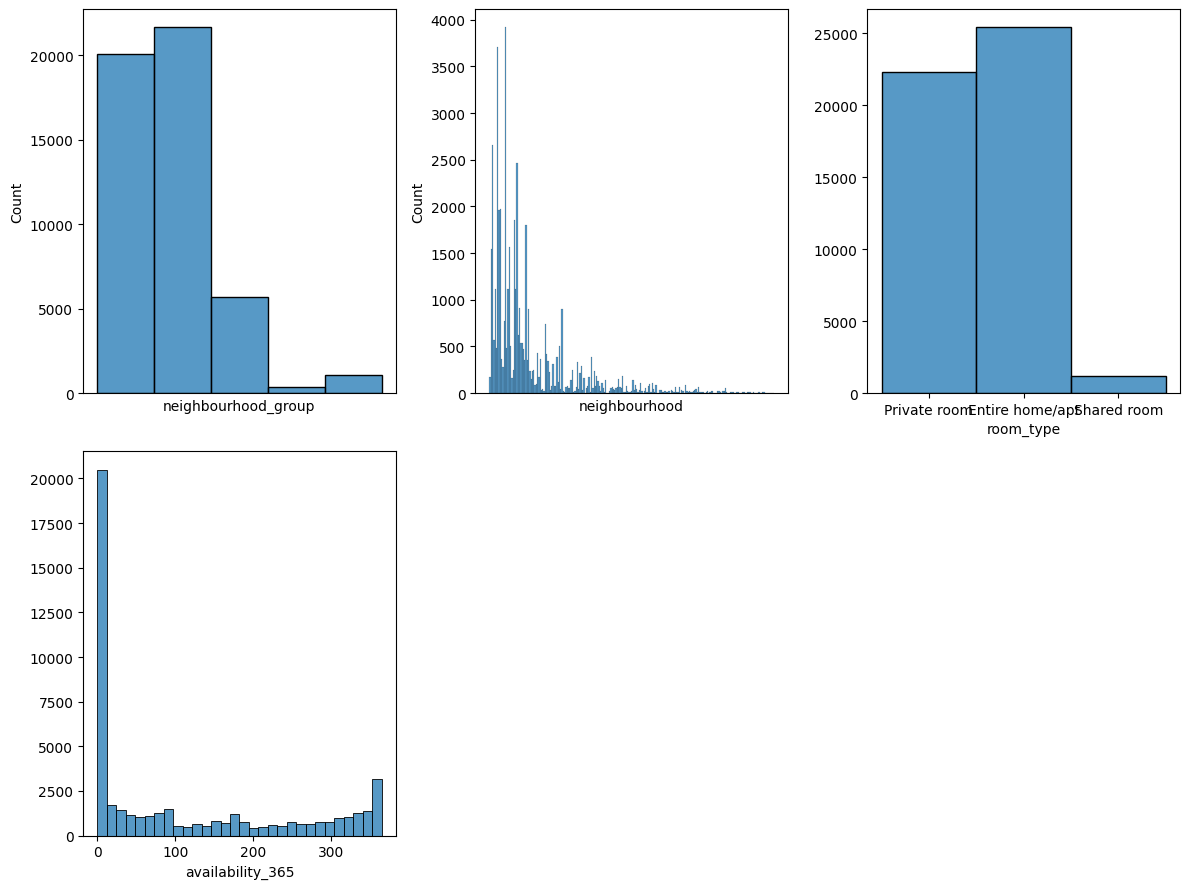

In [253]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(2, 3, figsize = (12, 9))

# Crear un histograma múltiple
sns.histplot(ax=axis[0, 0], data=total_data, x="neighbourhood_group").set_xticks([])
sns.histplot(ax=axis[0, 1], data=total_data, x="neighbourhood").set_xticks([])
sns.histplot(ax=axis[0, 2], data=total_data, x="room_type").set(ylabel=None)
sns.histplot(ax=axis[1, 0], data=total_data, x="availability_365").set(ylabel=None)
fig.delaxes(axis[1, 1])
fig.delaxes(axis[1, 2])
# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

- En los datos observamos 5 zonas en alquiler en Nueva York
- De los zonas donde hay alquileres, se observa claramente dos zonas donde la oferta es muy superior a las demás
- Se observa que de los 3 tipos de apartamentos en alquiler, hay muchos más apartamentos y casas enteras en alquiler que habitaciones       compartidas
- De los datos de disponibilidad de días al año de las viviendas se observa que hay muchos datos nulos


### ANÁLISIS SOBRE VARIABLES NUMÉRICAS

### HAY QUE ARREGLAR LOS GRÁFICOS PARA QUE LA REPRESENTACIÓN SEA MÁS FIEL A LOS VALORES

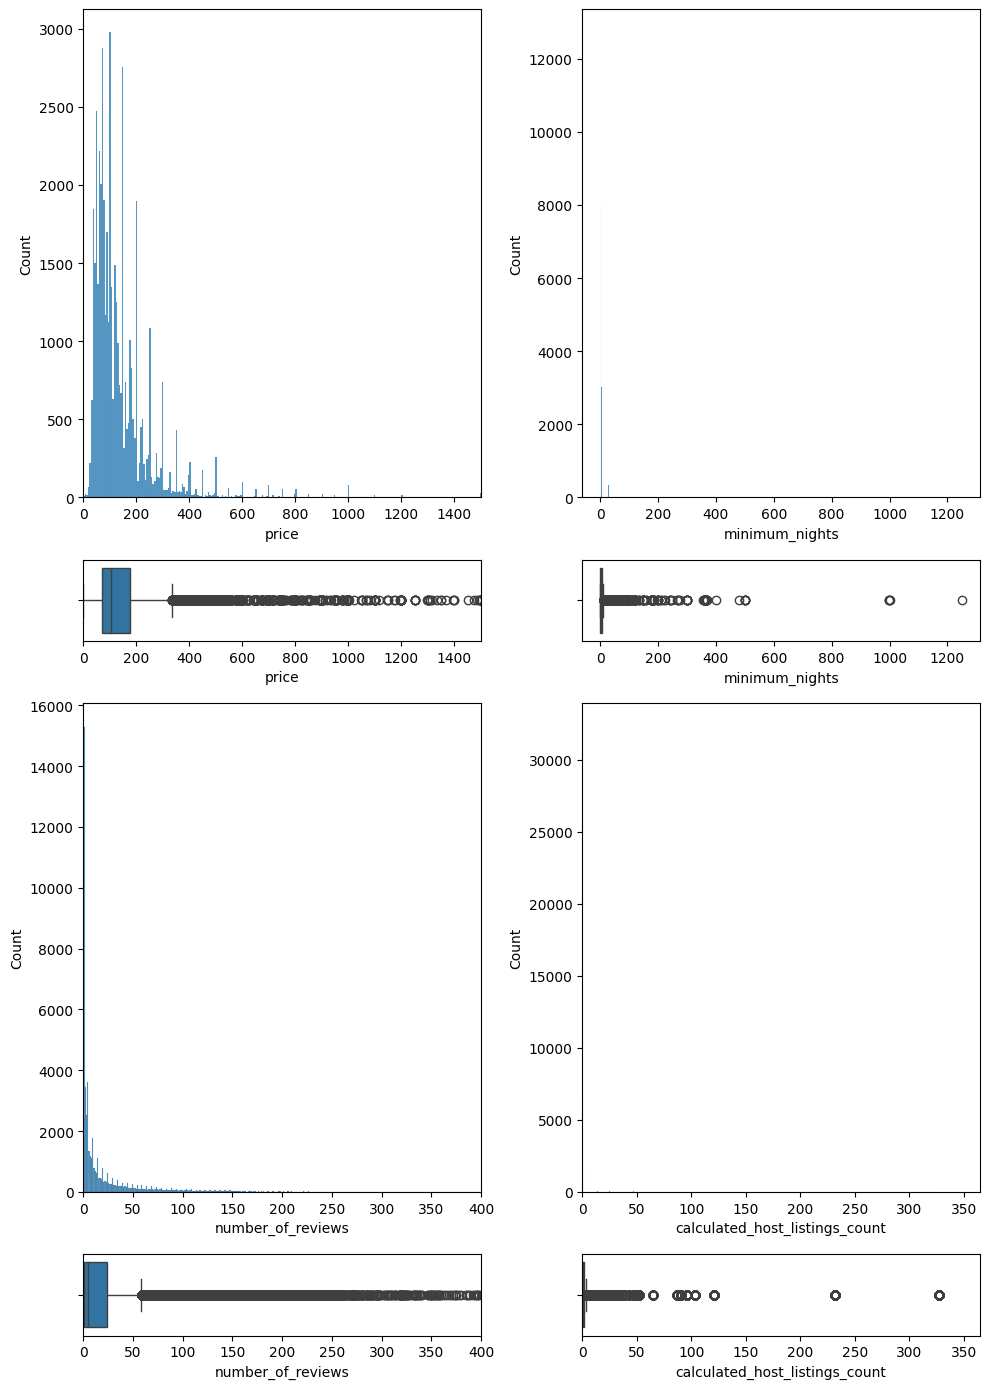

In [254]:
fig, axis = plt.subplots(4, 2, figsize = (10, 14), gridspec_kw = {"height_ratios": [6, 1, 6, 1]})

# Crear una figura múltiple con histogramas y diagramas de caja
sns.histplot(ax = axis[0, 0], data = total_data, x = "price")
sns.boxplot(ax = axis[1, 0], data = total_data, x = "price")

sns.histplot(ax = axis[0, 1], data = total_data, x = "minimum_nights")
sns.boxplot(ax = axis[1, 1], data = total_data, x = "minimum_nights")

sns.histplot(ax = axis[2, 0], data = total_data, x = "number_of_reviews")
sns.boxplot(ax = axis[3, 0], data = total_data, x = "number_of_reviews")

sns.histplot(ax = axis[2,1], data = total_data, x = "calculated_host_listings_count")
sns.boxplot(ax = axis[3, 1], data = total_data, x = "calculated_host_listings_count")

axis[0, 0].set_xlim(0, 1500)
axis[1, 0].set_xlim(0, 1500)
axis[2, 0].set_xlim(0, 400)
axis[3, 0].set_xlim(0, 400)
axis[2, 1].set_xlim(0, 365)
axis[3, 1].set_xlim(0, 365)

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

### Análisis numérico - numérico

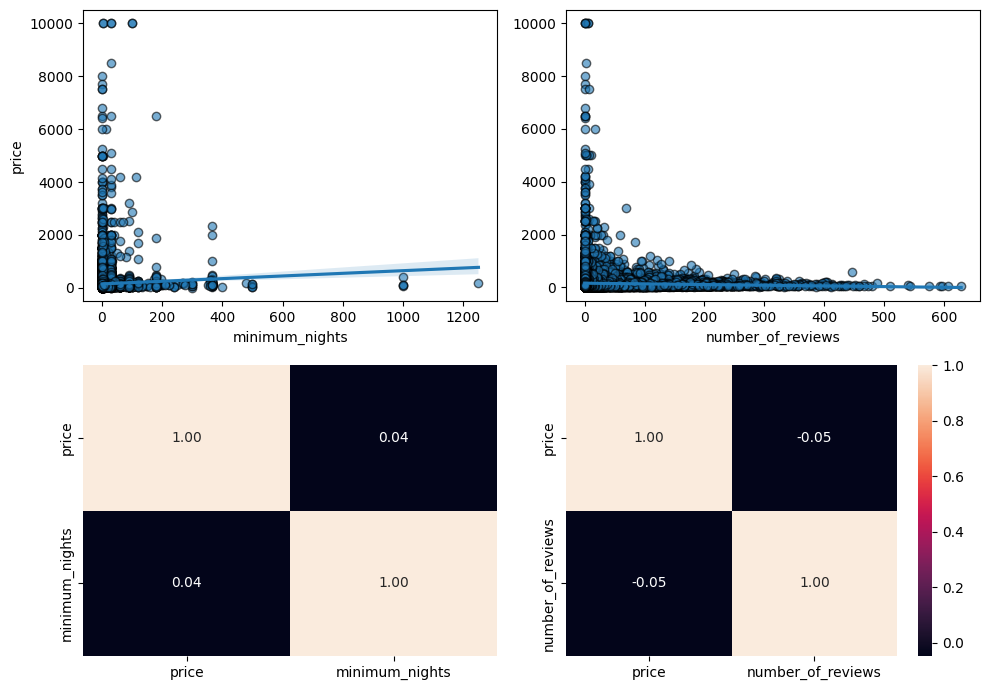

In [255]:
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = total_data, x = "minimum_nights", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})
sns.heatmap(total_data[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = total_data, x = "number_of_reviews", y = "price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6}).set(ylabel=None)
sns.heatmap(total_data[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

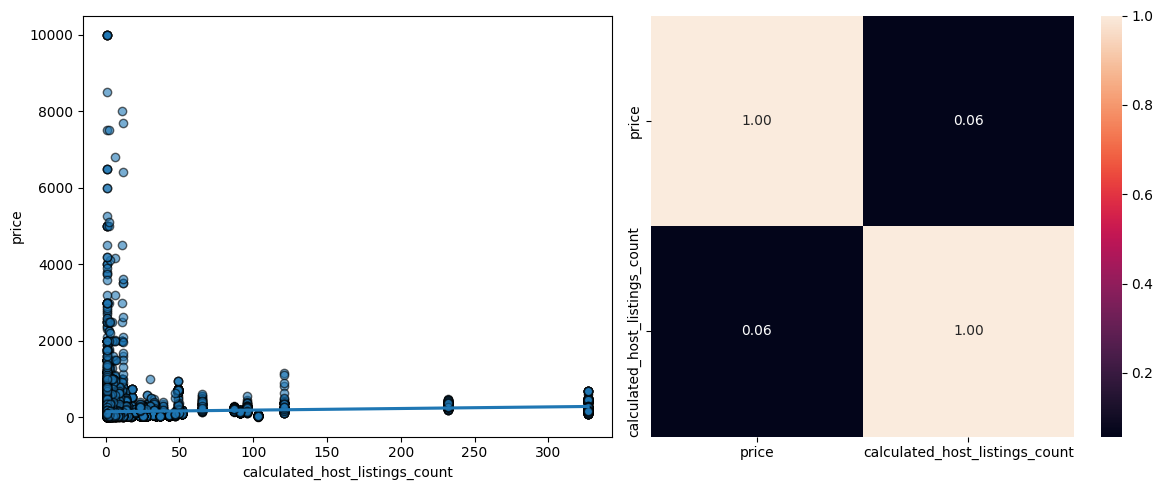

In [256]:
fig, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.regplot(ax=axis[0], data=total_data, x="calculated_host_listings_count", y="price", scatter_kws={'edgecolor': 'k', 'alpha': 0.6})

sns.heatmap(total_data[["price", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[1])


# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()



### ANÁLISIS CATEGÓRICO - CATEGÓRICO

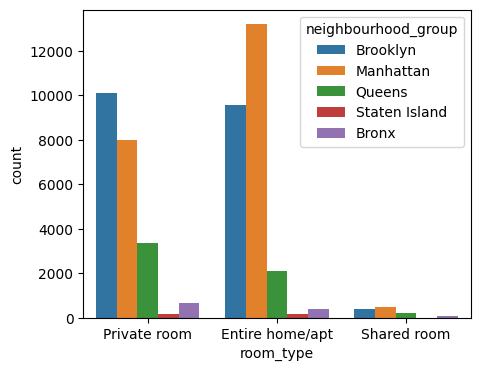

In [257]:
fig, axis = plt.subplots(figsize = (5, 4))

sns.countplot(data = total_data, x = "room_type", hue = "neighbourhood_group")

# Show the plot
plt.show()

##### Combinaciones de la clase con varias predictoras


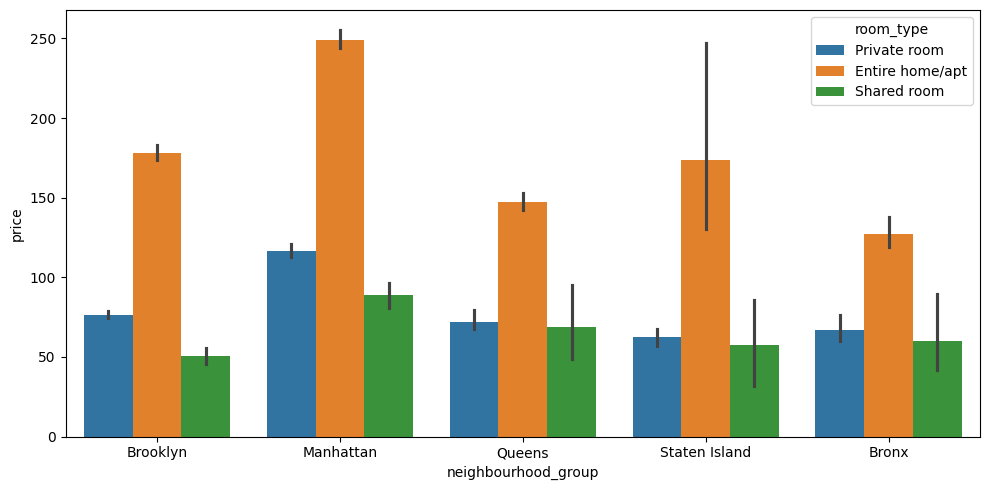

In [258]:
plt.figure(figsize = (10, 5))

sns.barplot(total_data, x = "neighbourhood_group", y = "price", hue = 'room_type')

plt.tight_layout()

plt.show()

### Sacar conclusiones de esta representación gráfica

In [259]:
print(total_data["neighbourhood_group"].unique().tolist())
print(total_data["neighbourhood"].unique().tolist())

['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
['Kensington', 'Midtown', 'Harlem', 'Clinton Hill', 'East Harlem', 'Murray Hill', 'Bedford-Stuyvesant', "Hell's Kitchen", 'Upper West Side', 'Chinatown', 'South Slope', 'West Village', 'Williamsburg', 'Fort Greene', 'Chelsea', 'Crown Heights', 'Park Slope', 'Windsor Terrace', 'Inwood', 'East Village', 'Greenpoint', 'Bushwick', 'Flatbush', 'Lower East Side', 'Prospect-Lefferts Gardens', 'Long Island City', 'Kips Bay', 'SoHo', 'Upper East Side', 'Prospect Heights', 'Washington Heights', 'Woodside', 'Brooklyn Heights', 'Carroll Gardens', 'Gowanus', 'Flatlands', 'Cobble Hill', 'Flushing', 'Boerum Hill', 'Sunnyside', 'DUMBO', 'St. George', 'Highbridge', 'Financial District', 'Ridgewood', 'Morningside Heights', 'Jamaica', 'Middle Village', 'NoHo', 'Ditmars Steinway', 'Flatiron District', 'Roosevelt Island', 'Greenwich Village', 'Little Italy', 'East Flatbush', 'Tompkinsville', 'Astoria', 'Clason Point', 'Eastchester', 'Kingsbridge

In [260]:
neighbourhood = total_data["neighbourhood"].unique().tolist()
room_types = ['Private room', 'Entire home/apt', 'Shared room']
neighbourhood_groups = ['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']

room_transformation_rules = {room_type: idx for idx, room_type in enumerate(room_types)}

neighbourhood_group_transformation_rules = {neighbourhood_group: idx for idx, neighbourhood_group in enumerate(neighbourhood_groups)}

neighbourhood_transformation_rules = {neighbourhood: idx for idx, neighbourhood in enumerate(neighbourhood)}


with open("room_transformation_rules.json", "w") as f:
    json.dump(room_transformation_rules, f)

with open("neighbourhood_group_transformation_rules.json", "w") as f:
    json.dump(neighbourhood_group_transformation_rules, f)

with open("neighbourhood_transformation_rules.json", "w") as f:
    json.dump(neighbourhood_transformation_rules, f)

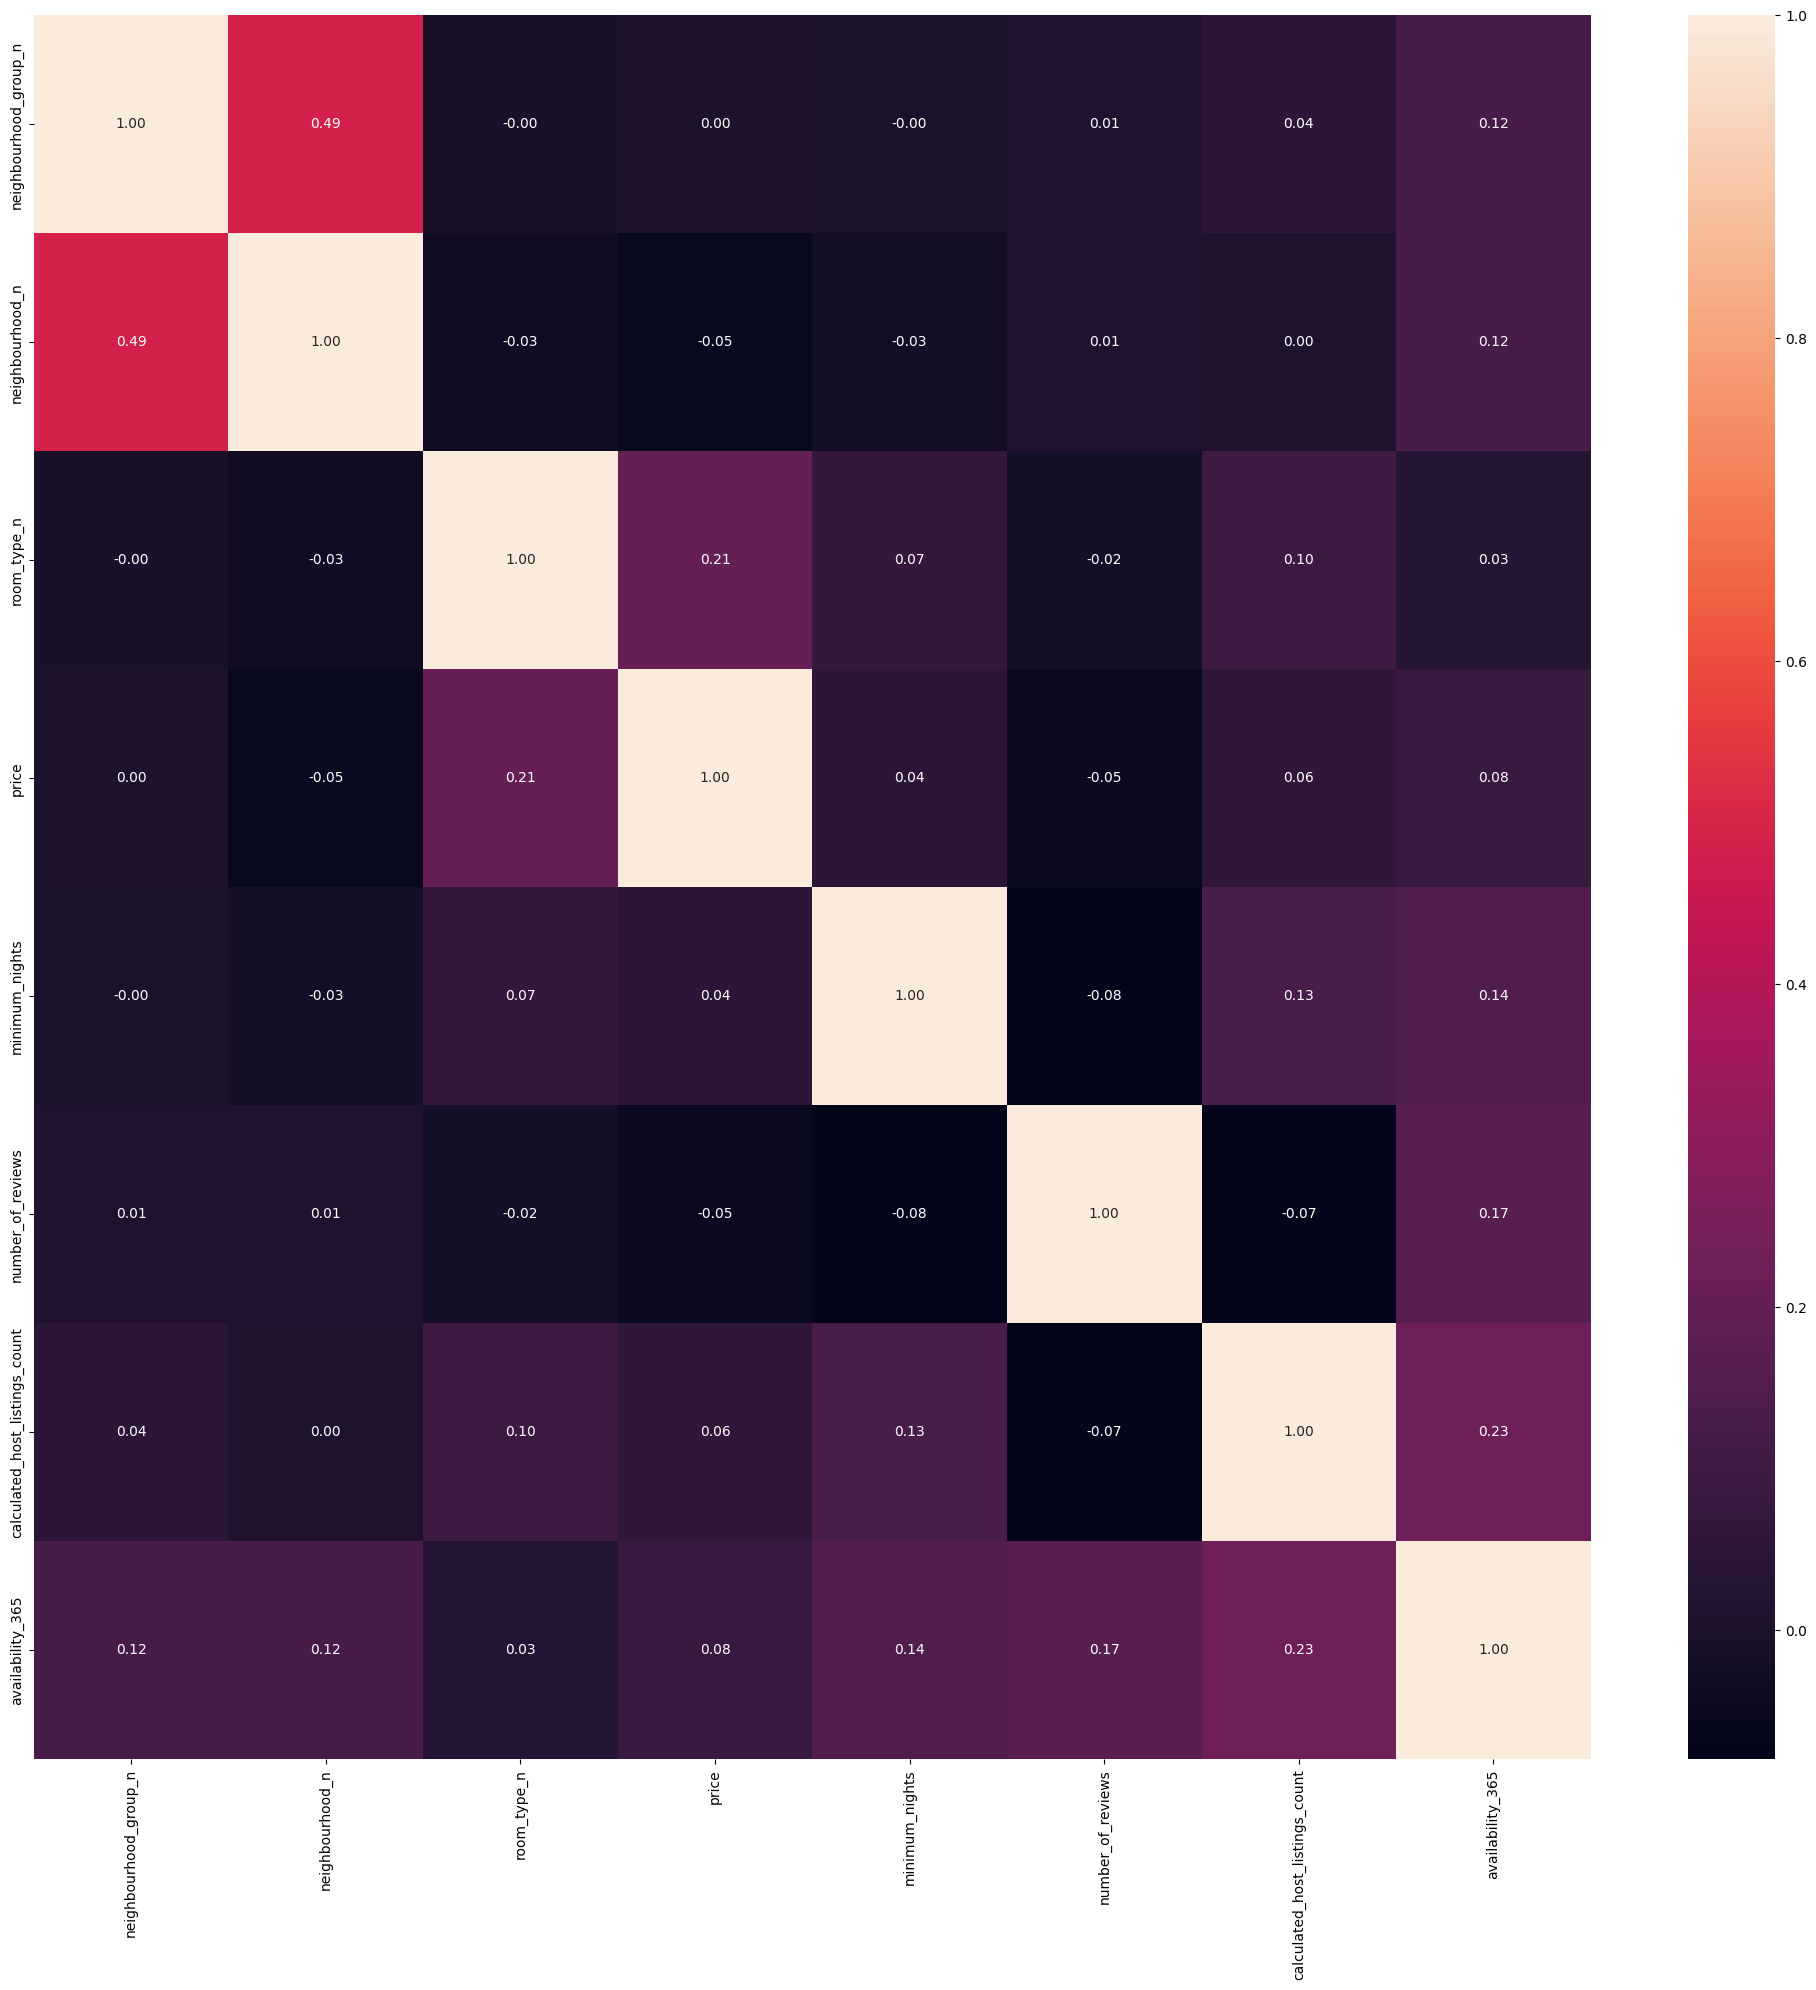

In [261]:
total_data["room_type_n"] = pd.factorize(total_data["room_type"])[0]
total_data["neighbourhood_group_n"] = pd.factorize(total_data["neighbourhood_group"])[0]
total_data["neighbourhood_n"] = pd.factorize(total_data["neighbourhood"])[0]

fig, axes = plt.subplots(figsize=(20, 20))

sns.heatmap(total_data[["neighbourhood_group_n", "neighbourhood_n", "room_type_n", "price", "minimum_nights",	
                        "number_of_reviews", "calculated_host_listings_count", "availability_365"]].corr(), annot = True, fmt = ".2f")

plt.tight_layout()

# Draw Plot
plt.show()

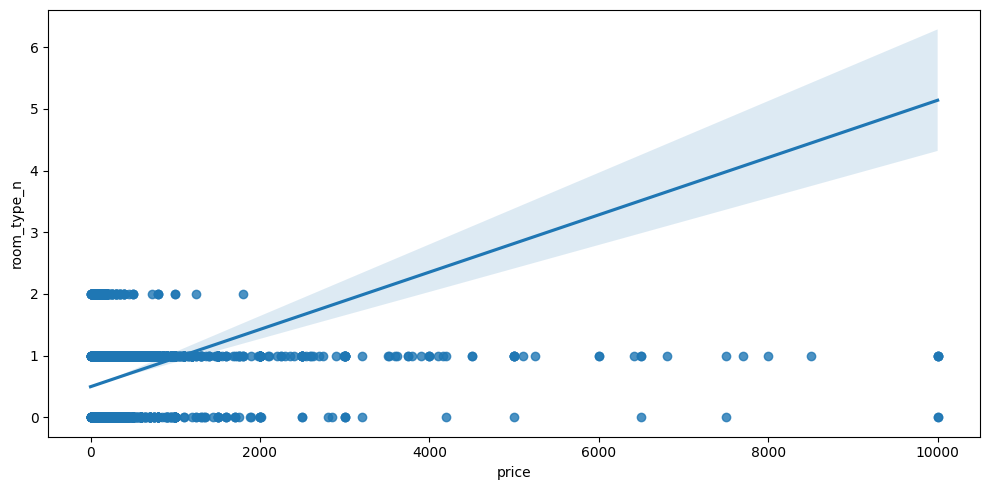

In [262]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "price", y = "room_type_n")

plt.tight_layout()

plt.show()

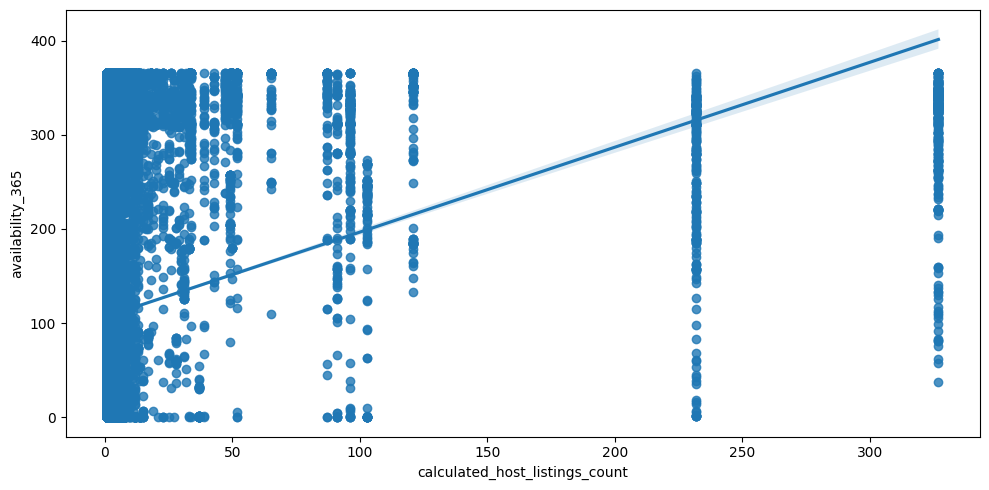

In [263]:
fig, axis = plt.subplots(figsize = (10, 5))

sns.regplot(data = total_data, x = "calculated_host_listings_count", y = "availability_365")

plt.tight_layout()

plt.show()

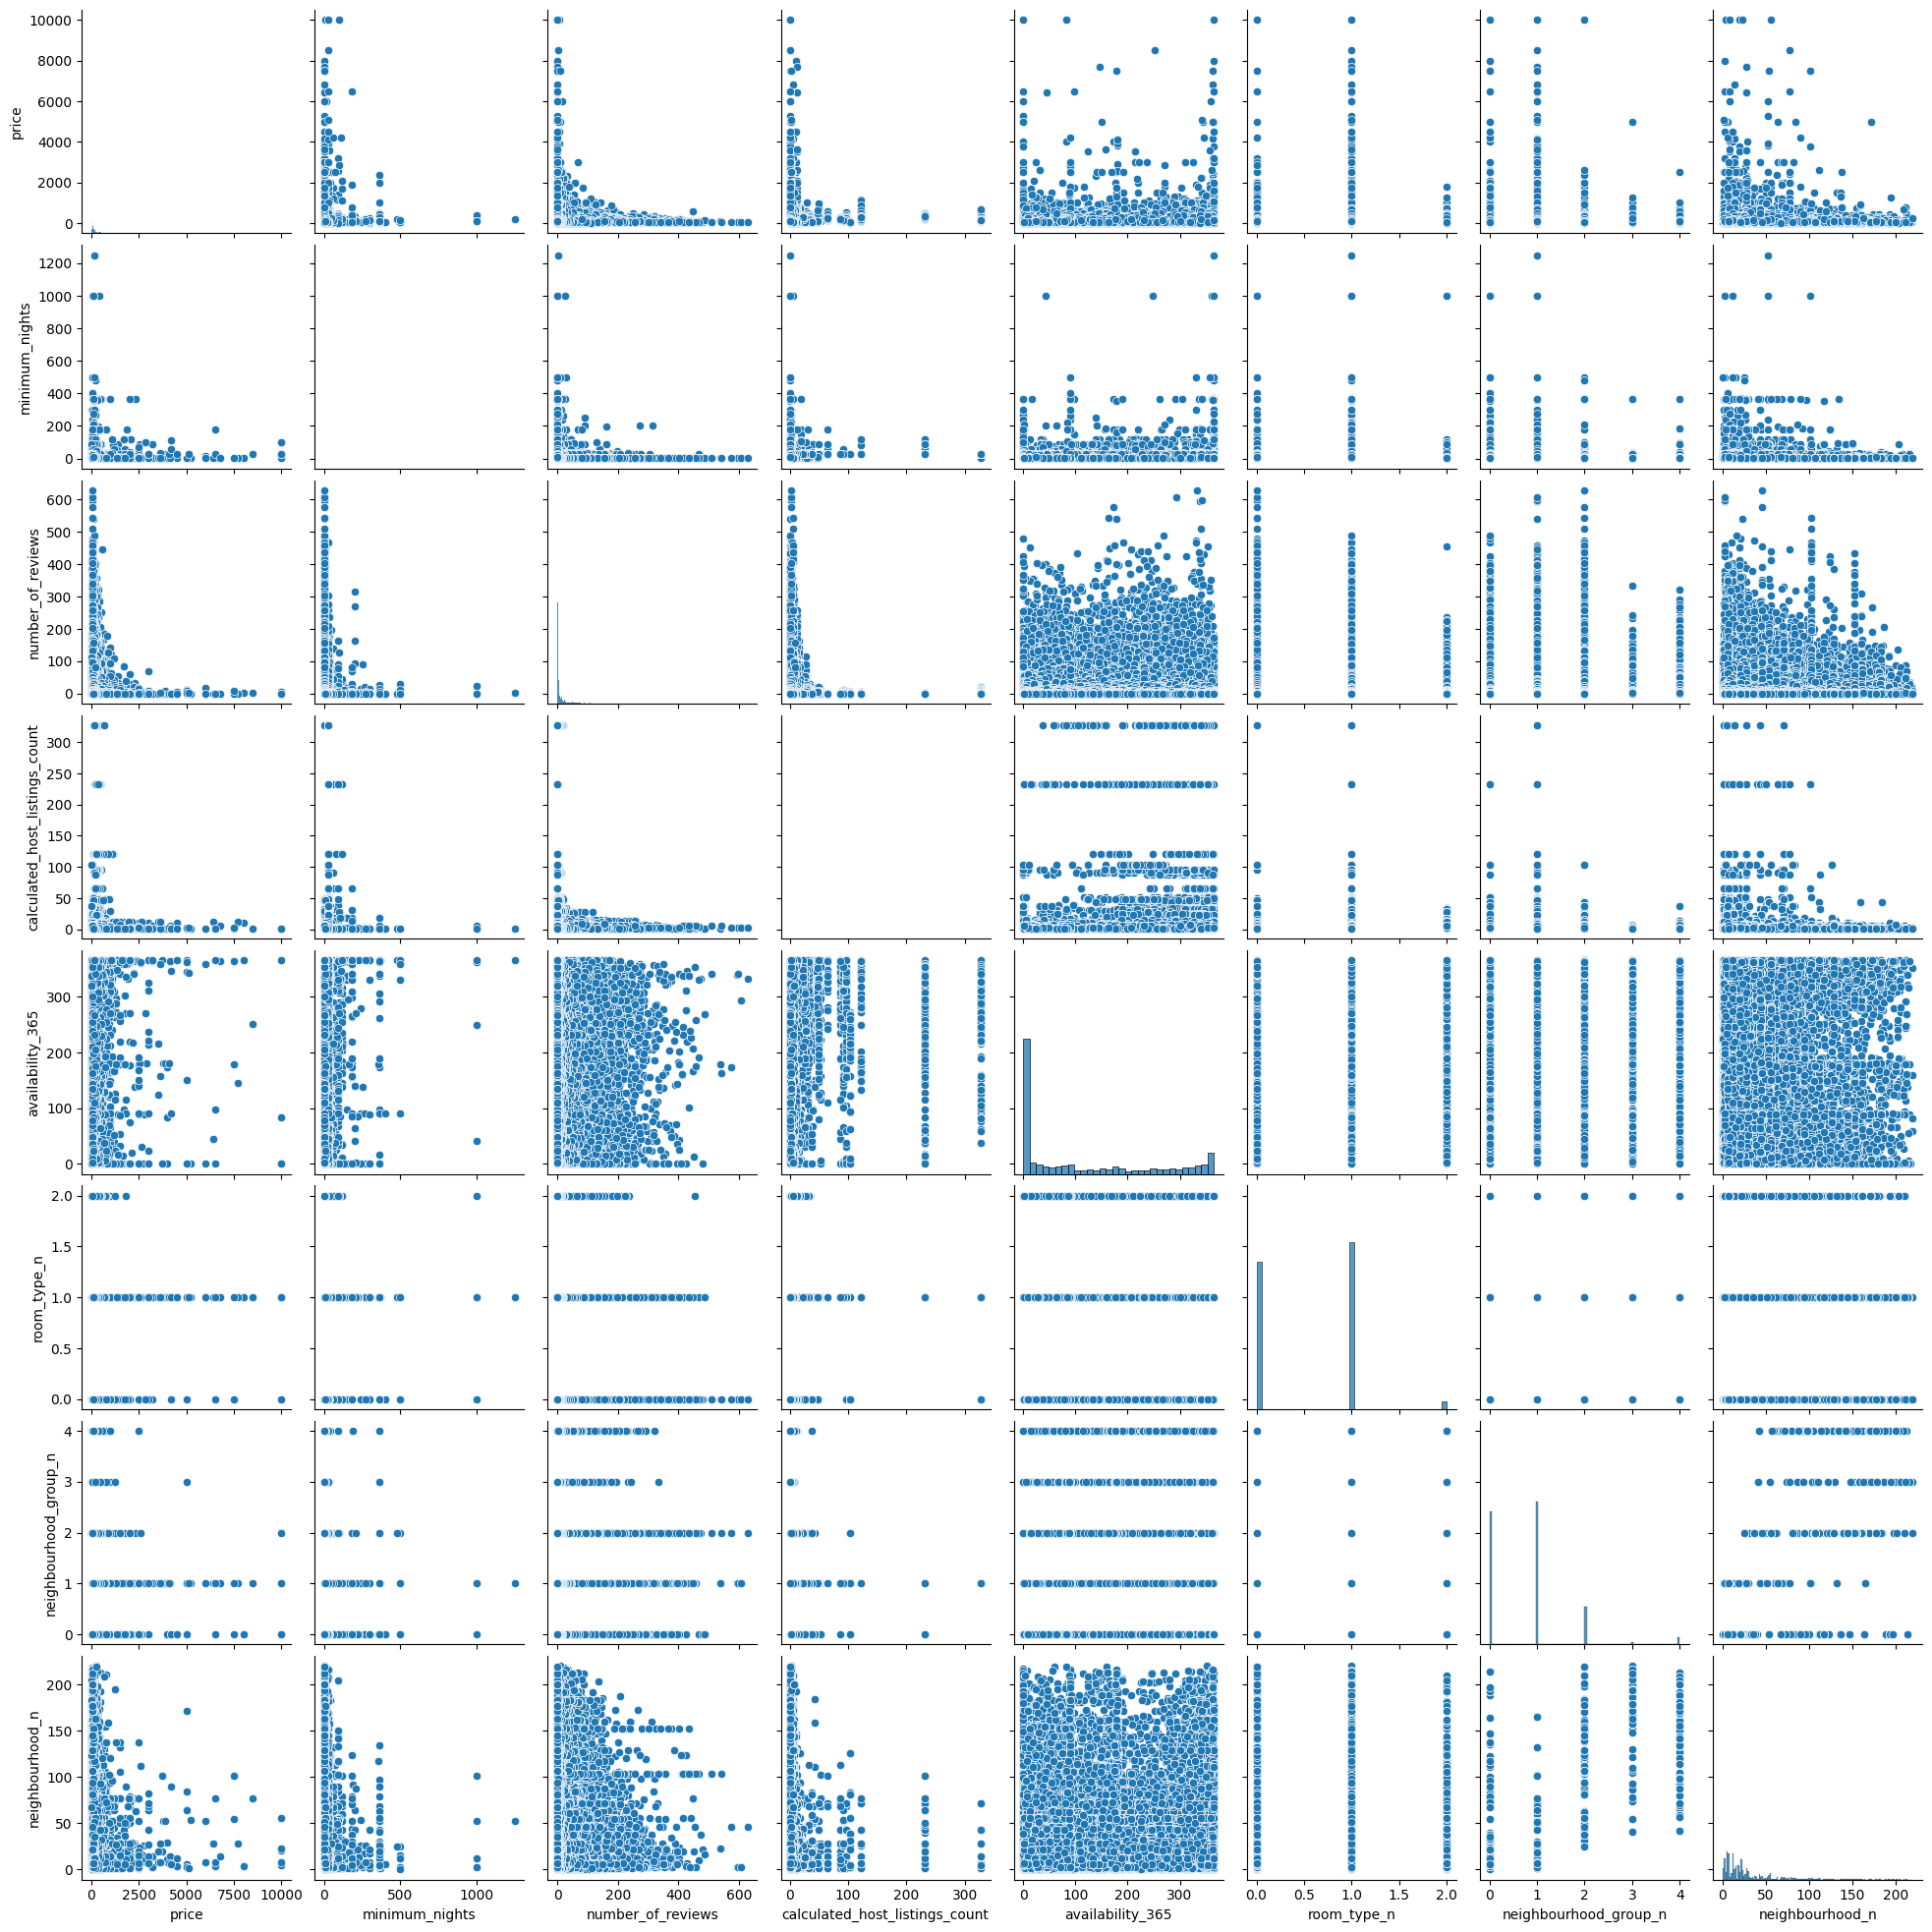

In [264]:
sns.pairplot(data = total_data)

In [265]:
total_data.describe()

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365,room_type_n,neighbourhood_group_n,neighbourhood_n
count,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,7.143982,112.781327,0.567113,0.786911,29.888782
std,240.154170,20.510550,44.550582,32.952519,131.622289,0.541249,0.844386,34.676634
min,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,69.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,7.500000
50%,106.000000,3.000000,5.000000,1.000000,45.000000,1.000000,1.000000,19.000000
75%,175.000000,5.000000,24.000000,2.000000,227.000000,1.000000,1.000000,37.000000
max,10000.000000,1250.000000,629.000000,327.000000,365.000000,2.000000,4.000000,220.000000


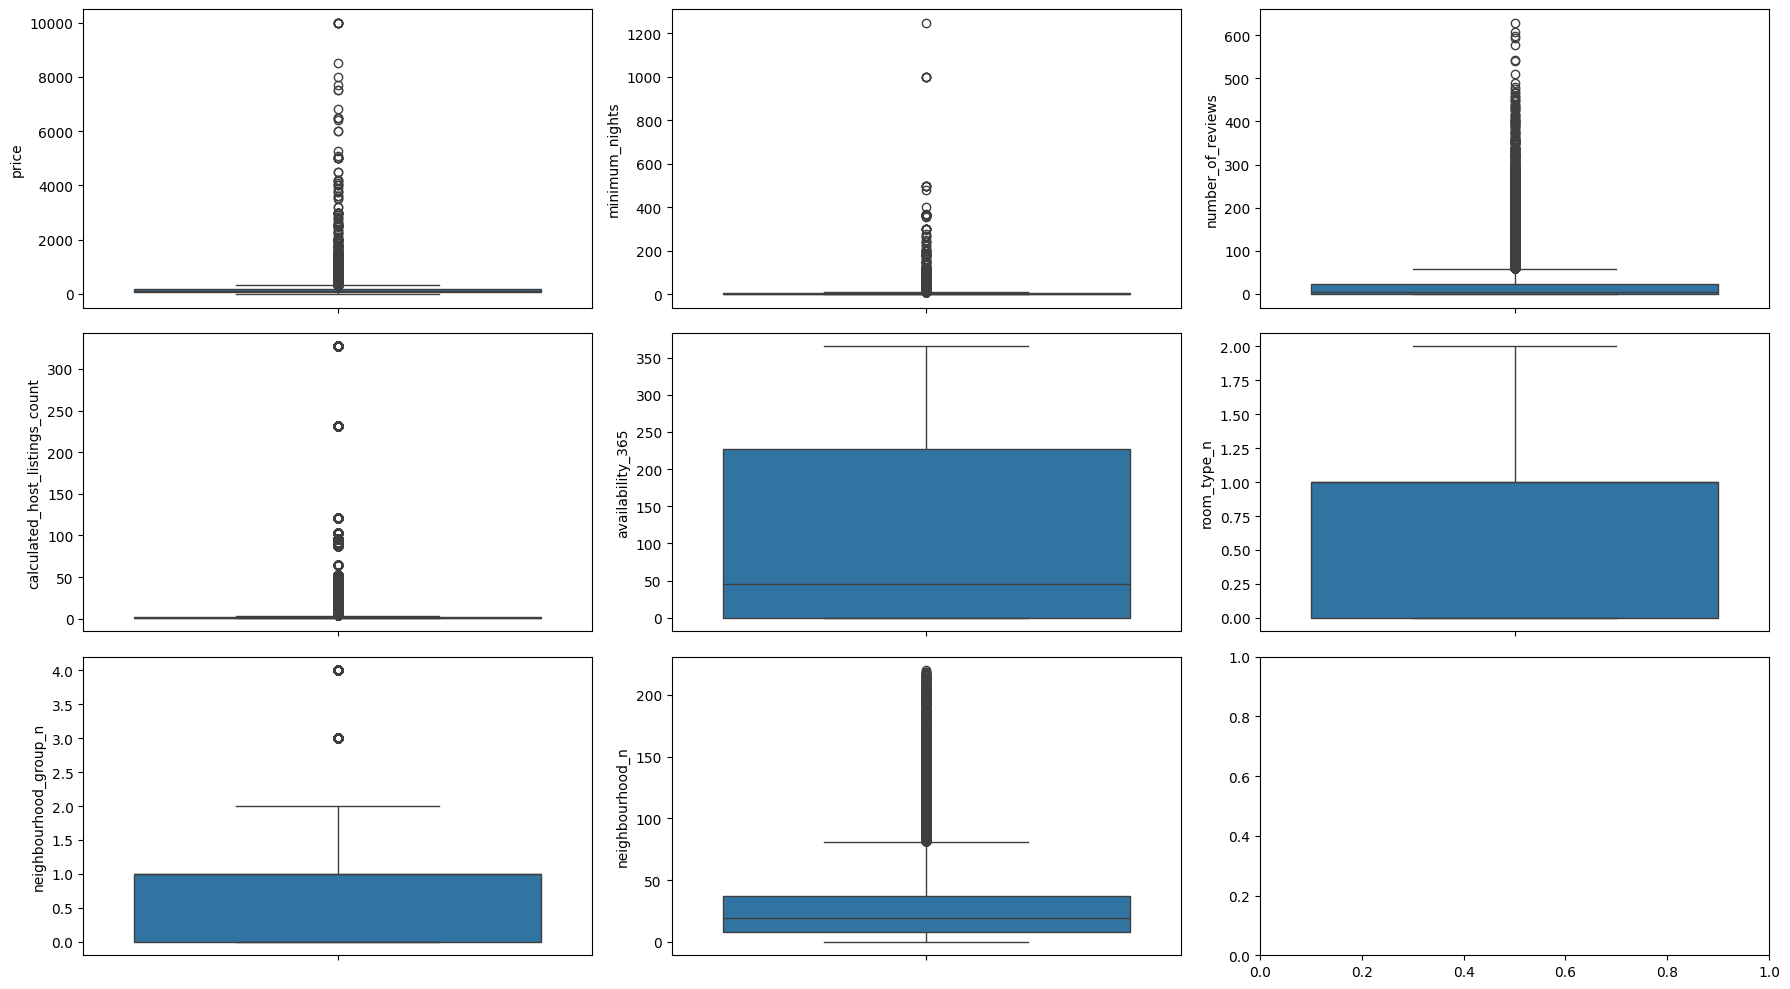

In [266]:
fig, axis = plt.subplots(3, 3, figsize=(18, 10))

sns.boxplot(ax=axis[0, 0], data=total_data, y="price")
sns.boxplot(ax=axis[0, 1], data=total_data, y="minimum_nights")
sns.boxplot(ax=axis[0, 2], data=total_data, y="number_of_reviews")

sns.boxplot(ax=axis[1, 0], data=total_data, y="calculated_host_listings_count")
sns.boxplot(ax=axis[1, 1], data=total_data, y="availability_365")
sns.boxplot(ax=axis[1, 2], data=total_data, y="room_type_n")

sns.boxplot(ax=axis[2, 0], data=total_data, y="neighbourhood_group_n")
sns.boxplot(ax=axis[2, 1], data=total_data, y="neighbourhood_n")

plt.tight_layout()
plt.show()

In [267]:
import json

total_data_con_outliers = total_data.copy()
total_data_sin_outliers = total_data.copy()

def replace_outliers_from_column(column, df):
  column_stats = df[column].describe()
  column_iqr = column_stats["75%"] - column_stats["25%"]
  upper_limit = column_stats["75%"] + 1.5 * column_iqr
  lower_limit = column_stats["25%"] - 1.5 * column_iqr
  if lower_limit < 0:
    lower_limit = min(df[column])
  # Remove upper outliers
  df[column] = df[column].apply(lambda x: x if (x <= upper_limit) else upper_limit)
  # Remove lower outliers
  df[column] = df[column].apply(lambda x: x if (x >= lower_limit) else lower_limit)
  return df.copy(), [lower_limit, upper_limit]

outliers_dict = {}
for column in ["price", "minimum_nights", "number_of_reviews", "calculated_host_listings_count", "neighbourhood_group_n", "neighbourhood_n"]:
  total_data_sin_outliers, limits_list = replace_outliers_from_column(column, total_data_sin_outliers)
  outliers_dict[column] = limits_list

with open("outliers_replacement.json", "w") as f:
   json.dump(outliers_dict, f)
outliers_dict

{'price': [0, np.float64(334.0)],
 'minimum_nights': [1, np.float64(11.0)],
 'number_of_reviews': [0, np.float64(58.5)],
 'calculated_host_listings_count': [1, np.float64(3.5)],
 'neighbourhood_group_n': [0, np.float64(2.5)],
 'neighbourhood_n': [0, np.float64(81.25)]}

### ANÁLISIS DE VALORES FALTANTES

In [268]:
total_data_con_outliers.isnull().sum().sort_values(ascending=False)


neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

In [269]:
total_data_sin_outliers.isnull().sum().sort_values(ascending=False)

neighbourhood_group               0
neighbourhood                     0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
calculated_host_listings_count    0
availability_365                  0
room_type_n                       0
neighbourhood_group_n             0
neighbourhood_n                   0
dtype: int64

In [270]:
from sklearn.model_selection import train_test_split

num_variables = ["minimum_nights", "number_of_reviews", "calculated_host_listings_count", "neighbourhood_group_n", "neighbourhood_n", "room_type_n"]

# Dividimos el conjunto de datos en muestras de train y test
X_con_outliers = total_data_con_outliers.drop("price", axis = 1)[num_variables]
X_sin_outliers = total_data_sin_outliers.drop("price", axis = 1)[num_variables]
y = total_data_con_outliers["price"]

X_train_con_outliers, X_test_con_outliers, y_train, y_test = train_test_split(X_con_outliers, y, test_size = 0.2, random_state = 42)
X_train_sin_outliers, X_test_sin_outliers = train_test_split(X_sin_outliers, test_size = 0.2, random_state = 42)

# GUARDAR LOS DATASETS
X_train_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_con_outliers.xlsx", index = False)
X_train_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_sin_outliers.xlsx", index = False)
X_test_con_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_con_outliers.xlsx", index = False)
X_test_sin_outliers.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_sin_outliers.xlsx", index = False)
y_train.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/y_train.xlsx", index = False)
y_test.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/y_test.xlsx", index = False)

X_train_con_outliers.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,3,11,1,0,12,1
23615,2,2,1,1,30,0
31183,2,0,2,0,6,0
29260,3,87,1,0,6,1
7275,5,13,1,2,31,0


### NORMALIZACIÓN

In [271]:
from sklearn.preprocessing import StandardScaler
import pickle

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
normalizador_con_outliers = StandardScaler()
normalizador_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/model/normalizador_con_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_con_outliers, file)

X_train_con_outliers_norm = normalizador_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_norm = pd.DataFrame(X_train_con_outliers_norm, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_norm = normalizador_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_norm = pd.DataFrame(X_test_con_outliers_norm, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_con_outliers_norm.xlsx", index = False)
X_test_con_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_con_outliers_norm.xlsx", index = False)

### NORMALIZAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
normalizador_sin_outliers = StandardScaler()
normalizador_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/model/normalizador_sin_outliers.pkl", "wb") as file:
  pickle.dump(normalizador_sin_outliers, file)

X_train_sin_outliers_norm = normalizador_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_norm = pd.DataFrame(X_train_sin_outliers_norm, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_norm = normalizador_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_norm = pd.DataFrame(X_test_sin_outliers_norm, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_sin_outliers_norm.xlsx", index = False)
X_test_sin_outliers_norm.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_sin_outliers_norm.xlsx", index = False)

X_train_con_outliers_norm.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,-0.193025,-0.277198,-0.186570,-0.931915,-0.514100,0.798949
23615,-0.239596,-0.479451,-0.186570,0.256169,0.005517,-1.050482
31183,-0.239596,-0.524396,-0.156424,-0.931915,-0.687306,-1.050482
29260,-0.193025,1.430714,-0.186570,-0.931915,-0.687306,0.798949
7275,-0.099884,-0.232253,-0.186570,1.444253,0.034385,-1.050482


##### Escalado Mínimo-Máximo

In [272]:
from sklearn.preprocessing import MinMaxScaler

### NORMALIZAMOS EL DATAFRAME CON OUTLIERS Y LO GUARDAMOS
scaler_con_outliers = MinMaxScaler()
scaler_con_outliers.fit(X_train_con_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/model/scaler_con_outliers.pkl", "wb") as file:
  pickle.dump(scaler_con_outliers, file)

X_train_con_outliers_scal = scaler_con_outliers.transform(X_train_con_outliers)
X_train_con_outliers_scal = pd.DataFrame(X_train_con_outliers_scal, index = X_train_con_outliers.index, columns = num_variables)

X_test_con_outliers_scal = scaler_con_outliers.transform(X_test_con_outliers)
X_test_con_outliers_scal = pd.DataFrame(X_test_con_outliers_scal, index = X_test_con_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_con_outliers_scal.xlsx", index = False)
X_test_con_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_con_outliers_scal.xlsx", index = False)

### ESCALAMOS EL DATAFRAME SIN OUTLIERS Y LO GUARDAMOS
scaler_sin_outliers = MinMaxScaler()
scaler_sin_outliers.fit(X_train_sin_outliers)

with open("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/model/scaler_sin_outliers.pkl", "wb") as file:
  pickle.dump(scaler_sin_outliers, file)

X_train_sin_outliers_scal = scaler_sin_outliers.transform(X_train_sin_outliers)
X_train_sin_outliers_scal = pd.DataFrame(X_train_sin_outliers_scal, index = X_train_sin_outliers.index, columns = num_variables)

X_test_sin_outliers_scal = scaler_sin_outliers.transform(X_test_sin_outliers)
X_test_sin_outliers_scal = pd.DataFrame(X_test_sin_outliers_scal, index = X_test_sin_outliers.index, columns = num_variables)

# GUARDAR LOS DATASETS
X_train_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_train_sin_outliers_scal.xlsx", index = False)
X_test_sin_outliers_scal.to_excel("/Users/jesus/Desktop/4geeks/4geeks - EDA (procesamiento de datos)/JESUS-cuenca-machine-learning-python-template/src/X_test_sin_outliers_scal.xlsx", index = False)

X_train_con_outliers_scal.head()

,minimum_nights,number_of_reviews,calculated_host_listings_count,neighbourhood_group_n,neighbourhood_n,room_type_n
32645,0.001601,0.017488,0.000000,0.00,0.054545,0.5
23615,0.000801,0.003180,0.000000,0.25,0.136364,0.0
31183,0.000801,0.000000,0.003067,0.00,0.027273,0.0
29260,0.001601,0.138315,0.000000,0.00,0.027273,0.5
7275,0.003203,0.020668,0.000000,0.50,0.140909,0.0
